In [152]:
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
load_dotenv()

True

In [88]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [89]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [90]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [91]:
#today = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
start_date = pd.Timestamp('2018-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-30', tz='America/New_York').isoformat()

In [145]:
tickers = ["AMZN",  "DPZ", "MCD",  "SBUX", "WEN", "WMT","YUM", "DRI","EAT", "UAL", "CCL", "NFLX", "GRUB", "UBER"]
#tickers = ["AMZN", "ASO", "BABA", "DIS", "DPZ", "EBAY", "ETSY", "FB", "MCD", "PYPL", "SBUX", "SHOP", "SQ", "TGT", "UBER", "WEN", "WMT", "GRUB", "MACY", "OSTK", "LVMUY", "WSM", "PPRUY","YUM", "SHLDQ", "DRI", "EAT", "NFLX"]
# List:  mcd, 
# algo_returns = algo_data.pct_change().dropna()
# algo_returns.head()
# Combinded returns
##  Plot price activity between 2018 and today
# avg price pre/post pandemic
# loc....
#  quantify (how much did these stocks go up or down)
#  pull in revenue data
#  (Pandemic affect price of stock)
#calculate all returns
#dropna
#
#algo_returns = algo_data.pct_change().dropna()
#algo_returns.head()

#pandas function that calculates corralation overtime of two series of numbers

#retail_stock_returns = closing price.pct_change().dropna()
#retail_stock_returns

In [107]:
timeframe = "1D"
print (timeframe)

1D


In [146]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

In [109]:
df_portfolio.index

DatetimeIndex(['2018-08-07 00:00:00-04:00', '2018-08-08 00:00:00-04:00',
               '2018-08-09 00:00:00-04:00', '2018-08-10 00:00:00-04:00',
               '2018-08-13 00:00:00-04:00', '2018-08-14 00:00:00-04:00',
               '2018-08-15 00:00:00-04:00', '2018-08-16 00:00:00-04:00',
               '2018-08-17 00:00:00-04:00', '2018-08-20 00:00:00-04:00',
               ...
               '2021-04-19 00:00:00-04:00', '2021-04-20 00:00:00-04:00',
               '2021-04-21 00:00:00-04:00', '2021-04-22 00:00:00-04:00',
               '2021-04-23 00:00:00-04:00', '2021-04-26 00:00:00-04:00',
               '2021-04-27 00:00:00-04:00', '2021-04-28 00:00:00-04:00',
               '2021-04-29 00:00:00-04:00', '2021-04-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='time', length=688, freq=None)

In [141]:
df_portfolio.isnull().sum()

AMZN  open      0
      high      0
      low       0
      close     0
      volume    0
               ..
YUM   open      0
      high      0
      low       0
      close     0
      volume    0
Length: 65, dtype: int64

<AxesSubplot:xlabel='time'>

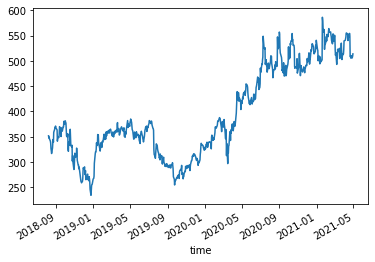

In [115]:
nflx = df_portfolio[('NFLX','close')]
nflx.plot()

<AxesSubplot:xlabel='time'>

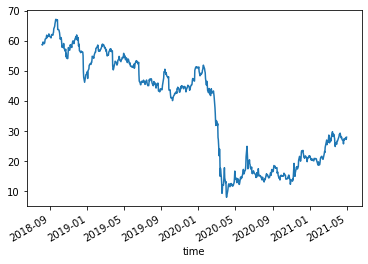

In [114]:
ccl = df_portfolio[('CCL','close')]
ccl.plot()

<AxesSubplot:xlabel='time'>

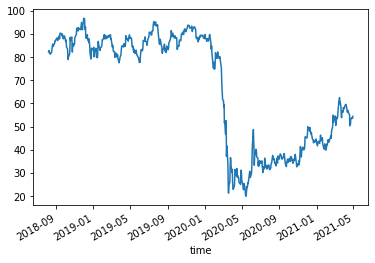

In [111]:
ual = df_portfolio[('UAL','close')]
ual.plot()

<AxesSubplot:xlabel='time'>

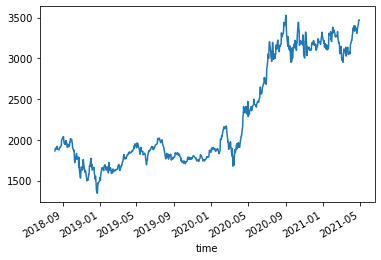

In [112]:
amzn =  df_portfolio[('AMZN','close')]
amzn.plot()

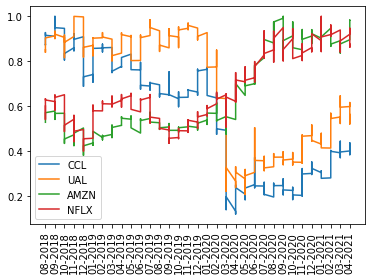

In [131]:
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), ccl.index.to_list())), ccl.to_numpy() / ccl.to_numpy().max(), label="CCL")
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), ual.index.to_list())), ual.to_numpy() / ual.to_numpy().max(), label="UAL")
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), amzn.index.to_list())), amzn.to_numpy() / amzn.to_numpy().max(), label="AMZN")
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), nflx.index.to_list())), nflx.to_numpy() / nflx.to_numpy().max(), label="NFLX")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

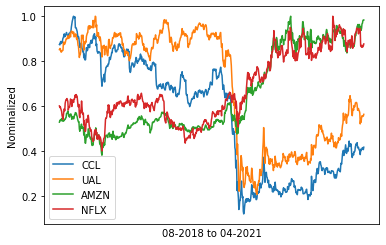

In [153]:
plt.plot(ccl.to_numpy() / ccl.to_numpy().max(), label="CCL")
plt.plot(ual.to_numpy() / ual.to_numpy().max(), label="UAL")
plt.plot(amzn.to_numpy() / amzn.to_numpy().max(), label="AMZN")
plt.plot(nflx.to_numpy() / nflx.to_numpy().max(), label="NFLX")
plt.legend()
plt.ylabel("Nominalized")
plt.xlabel('08-2018 to 04-2021')
plt.xticks([])
plt.show()

#

In [71]:
df_portfolio.dropna()

AMZN                                         \
                              open      high        low    close   volume   
time                                                                        
2018-08-07 00:00:00-04:00  1854.53  1869.720  1846.2700  1862.70  2596829   
2018-08-08 00:00:00-04:00  1861.00  1891.510  1854.5000  1886.52  3631508   
2018-08-09 00:00:00-04:00  1882.38  1914.570  1877.4800  1898.13  3755811   
2018-08-10 00:00:00-04:00  1888.51  1899.500  1878.2125  1886.00  2710068   
2018-08-13 00:00:00-04:00  1898.50  1925.000  1893.6700  1895.65  4399293   
...                            ...       ...        ...      ...      ...   
2021-04-26 00:00:00-04:00  3350.01  3428.450  3330.9400  3408.96  4540005   
2021-04-27 00:00:00-04:00  3443.37  3460.000  3398.0100  3417.43  3437223   
2021-04-28 00:00:00-04:00  3433.24  3489.880  3425.0000  3461.12  4240027   
2021-04-29 00:00:00-04:00  3503.99  3514.445  3435.0000  3471.31  5462247   
2021-04-30 00:00:00-04:00  3526.58  3554.000  3462.5000  3470.02  6264077   

                              DPZ                                    ...  \
                             open    high       low   close  volume  ...   
time                                                                 ...   
2018-08-07 00:00:00-04:00  278.27  279.51  275.5400  277.52  292567  ...   
2018-08-08 00:00:00-04:00  277.81  287.52  277.0000  286.97  401909  ...   
2018-08-09 00:00:00-04:00  286.89  295.24  285.9700  291.41  415005  ...   
2018-08-10 00:00:00-04:00  289.77  293.69  288.5000  291.35  332059  ...   
2018-08-13 00:00:00-04:00  293.11  293.11  286.9000  288.62  233177  ...   
...                           ...     ...       ...     ...     ...  ...   
2021-04-26 00:00:00-04:00  398.94  402.67  395.6100  400.48  399438  ...   
2021-04-27 00:00:00-04:00  400.02  403.38  399.4900  400.81  413916  ...   
2021-04-28 00:00:00-04:00  401.03  408.74  399.4700  404.38  822835  ...   
2021-04-29 00:00:00-04:00  399.27  419.36  391.2636  416.46  983893  ...   
2021-04-30 00:00:00-04:00  415.93  428.78  415.7400  422.07  600727  ...   

                              WMT                                       \
                             open     high      low   close     volume   
time                                                                     
2018-08-07 00:00:00-04:00   89.83   90.360   89.650   89.78  3341835.0   
2018-08-08 00:00:00-04:00   89.97   90.230   89.370   90.05  3736155.0   
2018-08-09 00:00:00-04:00   89.46   89.630   88.760   89.02  3927154.0   
2018-08-10 00:00:00-04:00   88.70   90.370   88.650   90.19  6668668.0   
2018-08-13 00:00:00-04:00   90.20   90.540   89.370   89.65  4696804.0   
...                           ...      ...      ...     ...        ...   
2021-04-26 00:00:00-04:00  139.91  140.000  137.640  137.92  6797784.0   
2021-04-27 00:00:00-04:00  138.00  138.945  137.550  138.39  4666458.0   
2021-04-28 00:00:00-04:00  138.31  138.590  137.865  137.92  4150586.0   
2021-04-29 00:00:00-04:00  137.98  140.000  137.900  139.62  5874037.0   
2021-04-30 00:00:00-04:00  139.90  139.990  139.110  139.93  4837677.0   

                              YUM                                   
                             open    high     low   close   volume  
time                                                                
2018-08-07 00:00:00-04:00   81.57   81.99   80.81   81.32  1320722  
2018-08-08 00:00:00-04:00   81.35   82.16   81.23   81.92  1088036  
2018-08-09 00:00:00-04:00   82.12   83.07   82.12   82.72   988654  
2018-08-10 00:00:00-04:00   82.29   83.30   82.07   82.93  1315019  
2018-08-13 00:00:00-04:00   82.97   83.34   82.01   82.38   927006  
...                           ...     ...     ...     ...      ...  
2021-04-26 00:00:00-04:00  117.95  117.95  115.36  115.70  1768391  
2021-04-27 00:00:00-04:00  116.04  116.50  115.80  116.29   886034  
2021-04-28 00:00:00-04:00  115.50  118.70  115.50  117.62  1580936  
2021-04-29 00:00:00-0

<AxesSubplot:xlabel='time'>

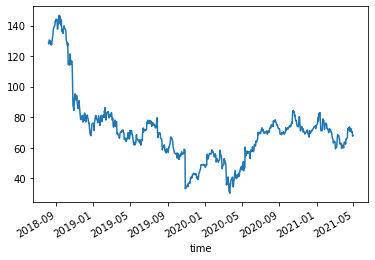

In [142]:
grub = df_portfolio[('GRUB','close')]
grub.plot()

<AxesSubplot:xlabel='time'>

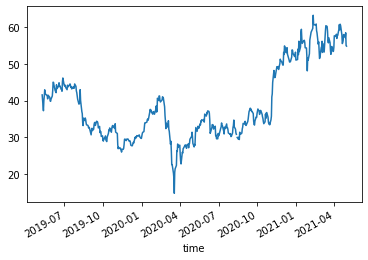

In [147]:
uber = df_portfolio[('UBER','close')]
uber.plot()

In [148]:
closing = pd.DataFrame({
    "AMZN": amzn, "CCL": ccl, "UAL": ual, "NFLX": nflx, "GRUB": grub, "UBER": uber
})
closing.corr()

#since amazon and nflx are closely corrolated
#people will will start going back on cruises and airlines both highly corrolated
#if i see united airlines go up, buy a bunch of carnival cruisline stocks because they are highly corrolated
#if something is good for airlines, probably good for cruise ships too

#if there is uptick in airlines, uptick in cruises
#UAL dropped 80% but has come back to 50% recovery
#AS PANDEMIC ENDS AND THEY BECOME MORE COMFORTABLE GOING IN PUBLIC,  TRAVEL STOCKS WILL BACK UP TO THEIR ORIGINAL PEAKS

,AMZN,CCL,UAL,NFLX,GRUB,UBER
AMZN,1.000000,-0.788786,-0.778093,0.957132,-0.017554,0.555602
CCL,-0.788786,1.000000,0.948660,-0.737488,0.424164,-0.031126
UAL,-0.778093,0.948660,1.000000,-0.773034,0.229224,-0.038816
NFLX,0.957132,-0.737488,-0.773034,1.000000,0.026245,0.589130
GRUB,-0.017554,0.424164,0.229224,0.026245,1.000000,0.573943
UBER,0.555602,-0.031126,-0.038816,0.589130,0.573943,1.000000


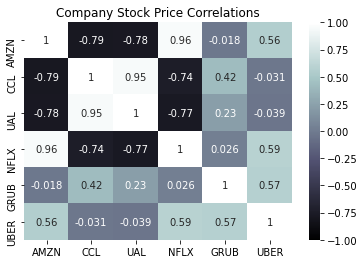

In [151]:
ax = plt.axes()
sns.heatmap(closing.corr(), ax=ax,vmin=-1, vmax=+1, annot=True, cmap="bone")
ax.set_title("Company Stock Price Correlations")
plt.show()

In [96]:
closing_price = df_portfolio.xs("close",axis="columns",level=1)
closing_price.dropna()

,AMZN,DPZ,DRI,EAT,MCD,SBUX,WEN,WMT,YUM
time,,,,,,,,,
2018-08-07 00:00:00-04:00,1862.70,277.52,109.95,44.510,156.05,52.06,17.020,89.78,81.32
2018-08-08 00:00:00-04:00,1886.52,286.97,109.88,44.850,158.90,51.55,17.260,90.05,81.92
2018-08-09 00:00:00-04:00,1898.13,291.41,109.42,45.180,159.24,51.91,17.760,89.02,82.72
2018-08-10 00:00:00-04:00,1886.00,291.35,109.48,44.185,158.68,51.51,17.650,90.19,82.93
2018-08-13 00:00:00-04:00,1895.65,288.62,109.33,43.820,158.13,51.82,17.355,89.65,82.38
...,...,...,...,...,...,...,...,...,...
2021-04-26 00:00:00-04:00,3408.96,400.48,142.18,65.340,232.31,115.92,22.215,137.92,115.70
2021-04-27 00:00:00-04:00,3417.43,400.81,142.63,65.660,235.01,116.20,22.270,138.39,116.29
2021-04-28 00:00:00-04:00,3461.12,404.38,143.87,67.790,232.47,112.41,22.270,137.92,117.62


In [97]:
closing_price.to_csv('../../data/cleandata/closing_prices.csv')


In [98]:
# List:  mcd, 
# algo_returns = algo_data.pct_change().dropna()
# algo_returns.head()
# Combinded returns
#calculate all returns
#dropna
#
#algo_returns = algo_data.pct_change().dropna()
#algo_returns.head()


retail_stock_returns = closing_price.pct_change().dropna()
retail_stock_returns

,AMZN,DPZ,DRI,EAT,MCD,SBUX,WEN,WMT,YUM
time,,,,,,,,,
2018-08-08 00:00:00-04:00,0.012788,0.034052,-0.000637,0.007639,0.018263,-0.009796,0.014101,0.003007,0.007378
2018-08-09 00:00:00-04:00,0.006154,0.015472,-0.004186,0.007358,0.002140,0.006984,0.028969,-0.011438,0.009766
2018-08-10 00:00:00-04:00,-0.006391,-0.000206,0.000548,-0.022023,-0.003517,-0.007706,-0.006194,0.013143,0.002539
2018-08-13 00:00:00-04:00,0.005117,-0.009370,-0.001370,-0.008261,-0.003466,0.006018,-0.016714,-0.005987,-0.006632
2018-08-14 00:00:00-04:00,0.012771,-0.003811,0.016738,-0.015062,0.015810,0.015052,0.028522,0.013352,0.008619
...,...,...,...,...,...,...,...,...,...
2021-04-26 00:00:00-04:00,0.020488,0.006940,-0.012433,-0.035572,-0.009677,-0.013699,-0.017470,-0.014012,-0.017159
2021-04-27 00:00:00-04:00,0.002485,0.000824,0.003165,0.004897,0.011622,0.002415,0.002476,0.003408,0.005099
2021-04-28 00:00:00-04:00,0.012784,0.008907,0.008694,0.032440,-0.010808,-0.032616,0.000000,-0.003396,0.011437


<AxesSubplot:xlabel='time'>

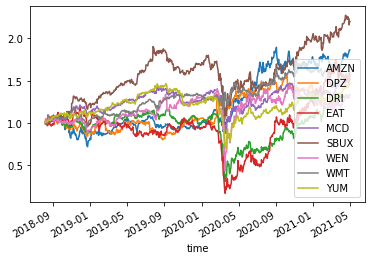

In [75]:
#cumulative_returns = (1 + retail_stock_returns)

cumulative_returns = (1 + retail_stock_returns).cumprod()

cumulative_returns.plot()

In [76]:
cumulative_std = cumulative_returns.std()
cumulative_std



AMZN    0.344056
DPZ     0.211872
DRI     0.186903
EAT     0.289992
MCD     0.122471
SBUX    0.292264
WEN     0.141266
WMT     0.192341
YUM     0.133565
dtype: float64

In [77]:
cumulative_returns.shape

(687, 9)

In [78]:
annualized_std = cumulative_returns.std() * np.sqrt(252)
annualized_std



AMZN    5.461720
DPZ     3.363356
DRI     2.967000
EAT     4.603480
MCD     1.944169
SBUX    4.639542
WEN     2.242532
WMT     3.053320
YUM     2.120273
dtype: float64

C:\Users\QLE\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


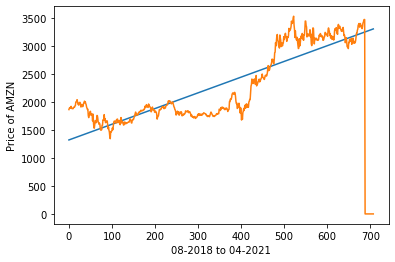

In [155]:
### Linear Example

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np

y = closing_price["AMZN"].values.reshape(-1, 1)
X = np.arange(closing_price.shape[0]).reshape(-1, 1)

reg = LinearRegression().fit(X,y)

future = X[-20:] + 20
regpred1 = reg.predict(X)
regpred2= reg.predict(future)

prediction = list(regpred1) + list(regpred2)
xaxis = list(X) + list(future)

plt.plot(xaxis,prediction)
plt.plot(xaxis,list(y)+20*[0])
plt.ylabel("Price of AMZN")
plt.xlabel('08-2018 to 04-2021')
plt.show()

In [ ]:
### Support Vector Machines Example
#from sklearn import svm

svm_regression_model = svm.SVR(kernel="poly")
svm_regression_model.fit(X,y)

svmpredict1 = svm.predict(X)
svmpredict2 = svm.predict(future)